# For NSL-KDD dataset

In [1]:
#Importing package
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
#Importing train and test set
train_set = pd.read_csv("..\\dataset\\nsl-train.csv")
test_set = pd.read_csv("..\\dataset\\nsl-test.csv")


# DDOS Attack SVM classifier

In [3]:
# One-class DDOS attack type train and test
train_ddos = train_set.copy()
test_ddos = test_set.copy()

#Converting ddos class to 'Yes' class and other classes to 'No' for ddos classifier
class_convert = {'ddos':'ddos','probe':'Not ddos','u2r':'Not ddos','r2l':'Not ddos','normal':'Not ddos'}

train_ddos['label'] = train_ddos.label.map(class_convert)
test_ddos['label'] = test_ddos.label.map(class_convert)


In [4]:
#Seperating the features and output
X_train_ddos = train_ddos.iloc[:,:-1].values
y_train_ddos = train_ddos.iloc[:,-1].values

X_test_ddos = test_ddos.iloc[:,:-1].values
y_test_ddos = test_ddos.iloc[:,-1].values


In [5]:
#One-class SVM classifier with gaussian kernel
from sklearn.svm import SVC
ddos_classifier = SVC(kernel='rbf')
ddos_classifier.fit(X_train_ddos,y_train_ddos)


SVC()

In [6]:
#Predictions
y_pred_ddos = ddos_classifier.predict(X_test_ddos)


In [7]:
#Confusion matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("One-class DDOS attack classifier")
print()
print(confusion_matrix(y_test_ddos, y_pred_ddos))
print()
print(classification_report(y_test_ddos, y_pred_ddos))


One-class DDOS attack classifier

[[7570    7]
 [  60 4460]]

              precision    recall  f1-score   support

    Not ddos       0.99      1.00      1.00      7577
        ddos       1.00      0.99      0.99      4520

    accuracy                           0.99     12097
   macro avg       1.00      0.99      0.99     12097
weighted avg       0.99      0.99      0.99     12097



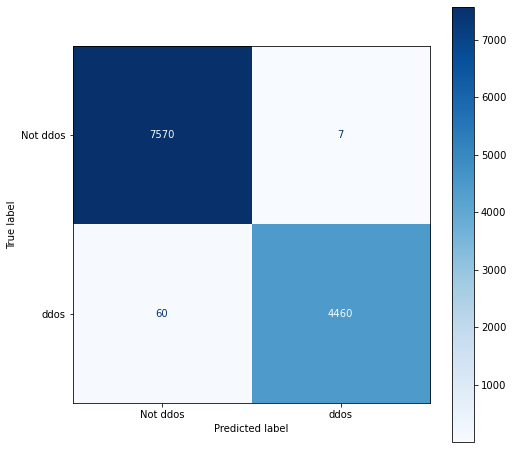

In [8]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=8,8
plot_confusion_matrix(ddos_classifier,X_test_ddos,y_test_ddos,display_labels = test_ddos['label'].unique(),cmap=plt.cm.Blues)
plt.show()

# 4-Class Attack type SVM classifier

In [9]:
# Segregating the 4 attack classes from the original dataset 
train_class4 = train_set[train_set["label"]!="ddos"].copy()
test_class4 = test_set[test_set["label"]!="ddos"].copy()


In [10]:
test_class4["label"].unique()


array(['normal', 'probe', 'r2l', 'u2r'], dtype=object)

In [11]:
#Seperating the features and output
X_train_class4 = train_class4.iloc[:,:-1].values
y_train_class4 = train_class4.iloc[:,-1].values

X_test_class4 = test_class4.iloc[:,:-1].values
y_test_class4 = test_class4.iloc[:,-1].values


In [12]:
#4-class SVM classifier with gaussian kernel
from sklearn.svm import SVC
class4_classifier = SVC(kernel='rbf')
class4_classifier.fit(X_train_class4,y_train_class4)


SVC()

In [13]:
#Predictions
y_pred_class4 = class4_classifier.predict(X_test_class4)


In [14]:
#Confusion matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("4-class DDOS attack type classifier")
print()
print(confusion_matrix(y_test_class4, y_pred_class4))
print()
print(classification_report(y_test_class4, y_pred_class4))


4-class DDOS attack type classifier

[[6165   29   39    0]
 [  25 1209    0    0]
 [  17    0   82    0]
 [   7    0    0    4]]

              precision    recall  f1-score   support

      normal       0.99      0.99      0.99      6233
       probe       0.98      0.98      0.98      1234
         r2l       0.68      0.83      0.75        99
         u2r       1.00      0.36      0.53        11

    accuracy                           0.98      7577
   macro avg       0.91      0.79      0.81      7577
weighted avg       0.99      0.98      0.98      7577



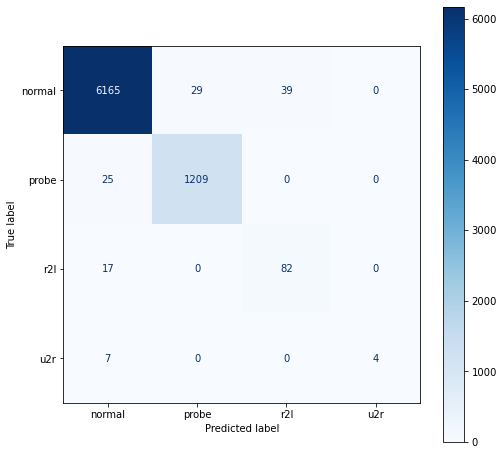

In [15]:
plot_confusion_matrix(class4_classifier,X_test_class4,y_test_class4,display_labels = test_class4['label'].unique(),cmap=plt.cm.Blues)
plt.show()

# 4-class SVM classifier predictions of DDOS classifier results

In [16]:
#Copying the original label to ddos test set
attack_ch = np.array(test_set['label'])
test_ddos['label2'] = attack_ch


In [17]:
#Putting the predictions from the first classifier into the test set for the 2nd classsifier
test_ddos['label3'] = y_pred_ddos


In [18]:
test_ddos

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label2,label3
0,0.0,1.0,0.000000,0.714286,3.188489e-08,5.496446e-08,0.0,0.0,0.0,0.0,...,0.01,0.00,0.00,0.00,0.0,0.00,0.0,Not ddos,normal,Not ddos
1,0.0,0.5,0.684211,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,1.00,1.00,0.00,0.02,0.0,0.98,1.0,Not ddos,probe,Not ddos
2,0.0,0.5,0.315789,0.714286,2.398613e-07,6.656807e-06,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,Not ddos,normal,Not ddos
3,0.0,0.5,0.315789,0.714286,3.572557e-07,6.978959e-06,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,Not ddos,normal,Not ddos
4,0.0,0.5,0.578947,1.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.07,0.00,0.00,1.00,1.0,0.00,0.0,ddos,ddos,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12092,0.0,0.5,0.368421,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.08,0.00,0.00,0.00,0.0,1.00,1.0,ddos,ddos,ddos
12093,0.0,0.5,0.315789,0.714286,2.311655e-07,1.038218e-06,0.0,0.0,0.0,0.0,...,0.00,0.01,0.01,0.00,0.0,0.00,0.0,Not ddos,normal,Not ddos
12094,0.0,0.5,0.684211,1.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.06,0.00,0.00,1.00,1.0,0.00,0.0,ddos,ddos,ddos
12095,0.0,0.5,0.684211,1.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.08,0.00,0.00,1.00,1.0,0.00,0.0,ddos,ddos,ddos


In [19]:
#Set for prediction for the second classifier.
real_ch = test_ddos[test_ddos['label3']=='Not ddos']
x_real_ch_test = real_ch.iloc[:,:-3].values
y_real_ch_test = real_ch.iloc[:,-2].values

#False positives from DDOS SVM classifier
real_ch[real_ch['label2']=="ddos"]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label2,label3
34,0.000000,0.5,0.315789,0.714286,3.952277e-05,0.000006,0.0,0.000000,0.0,0.025974,...,0.00,0.00,0.0,0.00,0.00,0.01,0.01,ddos,ddos,Not ddos
407,0.000000,0.5,0.315789,0.714286,3.952277e-05,0.000006,0.0,0.000000,0.0,0.025974,...,0.00,0.03,0.0,0.03,0.03,0.03,0.03,ddos,ddos,Not ddos
466,0.000000,0.5,0.315789,0.714286,3.952277e-05,0.000006,0.0,0.000000,0.0,0.025974,...,0.00,0.02,0.0,0.00,0.00,0.02,0.02,ddos,ddos,Not ddos
837,0.000000,0.5,0.315789,0.714286,3.952277e-05,0.000006,0.0,0.000000,0.0,0.025974,...,0.00,0.00,0.0,0.00,0.00,0.02,0.02,ddos,ddos,Not ddos
847,0.000000,0.5,0.315789,0.714286,3.952277e-05,0.000006,0.0,0.000000,0.0,0.025974,...,0.00,0.01,0.0,0.00,0.00,0.02,0.02,ddos,ddos,Not ddos
959,0.000000,0.5,0.315789,0.714286,3.952277e-05,0.000006,0.0,0.000000,0.0,0.025974,...,0.00,0.04,0.0,0.00,0.00,0.07,0.07,ddos,ddos,Not ddos
1105,0.000000,0.5,0.315789,0.714286,3.952277e-05,0.000006,0.0,0.000000,0.0,0.025974,...,0.00,0.01,0.0,0.00,0.00,0.02,0.02,ddos,ddos,Not ddos
1711,0.000000,0.5,0.315789,0.714286,3.952277e-05,0.000006,0.0,0.000000,0.0,0.025974,...,0.00,0.06,0.0,0.00,0.00,0.06,0.06,ddos,ddos,Not ddos
1763,0.000000,0.5,0.315789,0.714286,3.952277e-05,0.000006,0.0,0.000000,0.0,0.025974,...,0.00,0.01,0.0,0.00,0.00,0.02,0.02,ddos,ddos,Not ddos
2011,0.000000,0.5,0.315789,0.714286,3.952277e-05,0.000006,0.0,0.000000,0.0,0.025974,...,0.00,0.00,0.0,0.00,0.00,0.05,0.05,ddos,ddos,Not ddos


In [20]:
y_real_ch_pred = class4_classifier.predict(x_real_ch_test)

print(np.unique(y_real_ch_test))
print()
print(np.unique(y_real_ch_pred))

['ddos' 'normal' 'probe' 'r2l' 'u2r']

['normal' 'probe' 'r2l' 'u2r']


In [21]:
#Confusion matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("4-class DDOS attack type classifier")
print()
print(confusion_matrix(y_real_ch_test, y_real_ch_pred))
print()
print(classification_report(y_real_ch_test, y_real_ch_pred,zero_division=0))


4-class DDOS attack type classifier

[[   0   58    1    1    0]
 [   0 6160   29   39    0]
 [   0   25 1209    0    0]
 [   0   16    0   82    0]
 [   0    6    0    0    4]]

              precision    recall  f1-score   support

        ddos       0.00      0.00      0.00        60
      normal       0.98      0.99      0.99      6228
       probe       0.98      0.98      0.98      1234
         r2l       0.67      0.84      0.75        98
         u2r       1.00      0.40      0.57        10

    accuracy                           0.98      7630
   macro avg       0.73      0.64      0.66      7630
weighted avg       0.97      0.98      0.97      7630



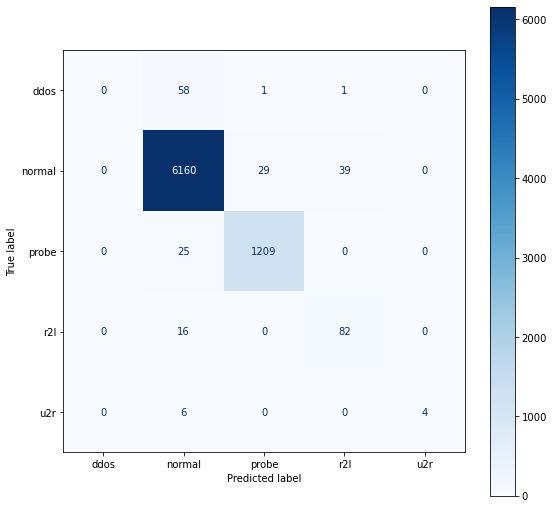

In [22]:
plt.rcParams['figure.figsize']=9,9
plot_confusion_matrix(class4_classifier,x_real_ch_test,y_real_ch_test,display_labels = np.unique(y_real_ch_test),cmap=plt.cm.Blues)
plt.show()